# Temel Sinyaller, Temel İşlemler

<a href="https://colab.research.google.com/drive/1_1K9OvqWCOJ3EdVjkP0V4XkEwdNVTQTz?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bilgisayarda verilerimiz (görüntü, metin, vb.) sayı dizisi olarak temsil edilir. Ses için de aynı durum geçerlidir: ses verilerimiz analog elektrik sinyalinden belirli zaman aralıklarıyla alınan değerlerin yanyana yerleştirilmesiyle elde edilen dizilerle temsil edilir. Bilgisayarla sayısal sinyal işleme bağlamında _sayısal sinyal_ kavramını "sayı dizisi" olarak düşünebiliriz.  

| <img src="https://github.com/barisbozkurt/dataDumpForCourses/raw/32c30c8226f532c9b3783307ee8caae342f3e881/cizimler/digitalSound.jpeg" width=700 height=300 /> |
| :-----------------------------------------------------------------------------------------------------------------------------------------------------------: |
|                                                   Şekil 1.1: _Ses sinyalinin sayısal sinyal olarak temsili_                                                   |



Bu nedene sayısal ses işleme algoritması tasarlamak temelde dizi işlemleri yapan fonksiyonlar yazmaya karşılık gelir. Analiz için yazılan fonksiyonlarda,  işlenen sinyalin bazı temel sinyaller (örneğin sinüsler) cinsinden ifade edilmesini sağlayan işlemler gerçekleştirilir. Sentez için yazılan fonksiyonlarda da temel sinyalleri değiştirip toplayarak hedeflenen sinyal oluşturulur. Bu defterde amaç sayısal sinyal işlemede yaygın olarak kullanılan temel sinyallerin oluşturulmasına örnekler sunmak ve verilen bir sinyalin analizinde kullanılan temel dizi işlemlerine giriş yapmaktır. Bu defter aynı zamanda Python ile ses işlemeye başlama için atılacak ilk küçük adım olarak da düşünülebilir. 

Defter boyunca Python'da dizi işlemleri için en yaygın olarak tercih edilen kütüphane olan [NumPy](https://numpy.org/) kütüphanesini kullanacağız. Daha önce NumPy kütüphanesini kullanmadıysanız öncelikle temel düzeyde bilgi sahibi olmak için yardımcı bir kaynağı incelemenizi öneririz. [Stanford Üniversitesi CS231n dersinin yardımcı kaynağını](https://cs231n.github.io/python-numpy-tutorial/) veya [_NumPy QuickStart_](https://numpy.org/doc/stable/user/quickstart.html) dokümanını inceleyebilirsiniz.  


## Temel sinyaller

### Birim dürtü, birim basamak, rampa ve üstel sinyaller

İlk olarak birim dürtü (İng: unit sample, delta), birim basamak (İng: unit step), rampa sinyali (İng: ramp signal) ve üstel seri (İng: power series) sinyallerini ele alacağız. Sinüzoidal sinyalleri üstel seri sinyallerinin özel bir hali olarak ele alacağız. Bu dört sinyal türü ve varyantları, ihtiyacımız olan temel sinyal bileşenlerini oluşturmak için yeterli olacak. Örneğin verilen herhangi bir sayısal sinyal, bir dizi dürtü sinyalinin toplamı olarak temsil edilebilir. Bu temel sinyalleri kodla oluşturarak başlayalım. 


**Önemli not**: Sinyal işleme kuramı formüllerinde uzunluk ve zaman boyutlarında sonsuz ifadeler yaygın olarak kullanılır. Sınırlı bir hafızada işlem yaptığımız için sinyallerimizi sınırlı uzunlukta tutmak zorundayız. Örneğin birim basamak fonksiyonu tanım gereği sonsuz uzunlukta bir sinyal olarak ifade edilse de biz birim basamak sinyalini sınırlı bir uzunlukta oluşturup kullanacağız. 

Birim dürtü:

$$\delta[n] =
  \begin{cases}
    0,  & \quad n \neq 0\\
    1,  & \quad n = 0
  \end{cases}
$$

Birim basamak:

$$u[n] =
  \begin{cases}
    0,  & \quad n < 0\\
    1,  & \quad n \geq 0
  \end{cases}
$$

Üstel seri sinyali (eksponansiyel sinyal (İng: exponential signal)):

$$x[n] = \alpha^n $$

Temel sinyallerle ilgili inceleyebileceğiniz bir kaynak: [Ankara Üniversitesi Açık Ders Malzemeleri: Sayısal İşaret İşleme ](https://acikders.ankara.edu.tr/course/view.php?id=837)


Kullanacağımız kütüphaneleri yükleyerek başlayalım.

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython
import warnings
warnings.filterwarnings('ignore')

İlk olarak zaman eksenini temsil edecek N uzunluğunda bir dizi oluşturalım. _`n = [-N/2,...0,...N/2-1]`_ Burada _`n`_ tamsayı değerleri almakta ve örnek endeksi görevi taşımaktadır. Örneğin, saniyede 1000 örnek içeren bir sinyalde _`n = 100`_ endeksi ile eriştiğimiz sinyal değeri, kaydın 100. milisaniyesindeki ölçümle elde edilen veya sentezlenen örnektir.  

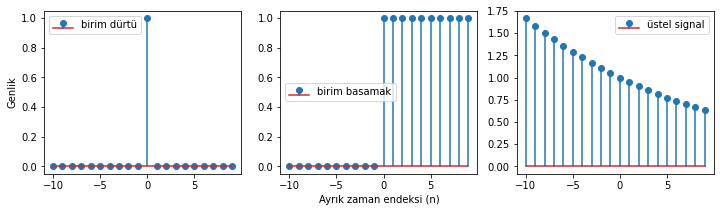

In [ ]:
# Negatif zaman endekslerini de dahil edecek şekilde oluşturalım
N = 20
n = np.arange(-N / 2, N / 2) # [-10, -9, ..., 8, 9]

# Birim dürtü: her yerde sıfır, sadece n=0'da 1
durtu = np.zeros((N, ))
durtu[n == 0] = 1

# Birim basamak: her yerde sıfır, sadece n >=0 için 1
basamak = np.zeros((N, ))
basamak[n >= 0] = 1

# Eksponansiyel/üstel sinyal 
alfa = 0.95
exp_sig = np.power(alfa, n) # veya exp_sig = np.array([pow(alfa,i) for i in n])

# Çizdirme işlemleri
fig = plt.figure(figsize=(12,3))
plt.subplot(1,3,1)   
plt.stem(n, durtu, label = 'birim dürtü')
plt.ylabel('Genlik');
plt.legend();
plt.subplot(1,3,2)
plt.stem(n, basamak, label = 'birim basamak')
plt.xlabel('Ayrık zaman endeksi (n)')
plt.legend();
plt.subplot(1,3,3)
plt.stem(n, exp_sig, label = 'üstel sinyal')
plt.legend();

Şekil 1.2: *Temel sayısal sinyaller: birim dürtü, birim basamak, üstel sinyal*

Birim dürtünün varyantı olarak düşünülebilecek önemli bir sinyal 'dürtü katarı'dır (İng: impulse train): belirli bir periyotta tekrarlanan dürtülerden oluşur. İleride örnekleme işlemlerini açıklarken ihtiyaç duyacağız. 50 örnek periyotlu bir dürtü katarı oluşturalım.  

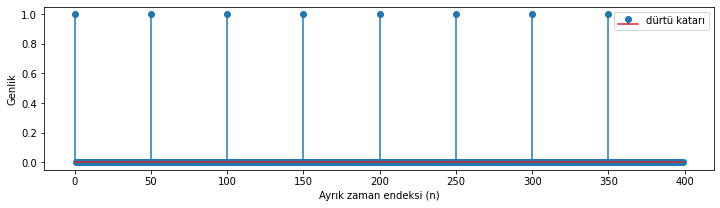

In [ ]:
# Bu örnekte sadece pozitif zaman endekslerini kullanalım
N = 400
n = np.arange(N)
T0 = 50

# Dürtü katarının oluşturulması
durtu_katari = np.zeros((N, ))
durtu_katari[ n % T0 == 0] = 1 # n'nin T0'a tam bölündüğü endekslerde değer 1'e eşleniyor

# Çizdirme işlemleri
fig = plt.figure(figsize=(12,3))  
plt.stem(n, durtu_katari, label = 'dürtü katarı')
plt.ylabel('Genlik');
plt.xlabel('Ayrık zaman endeksi (n)')
plt.legend();

Şekil 1.3: *Dürtü katarı sinyali*

Yukarıdaki sinyalin saniyenin eşit zaman adımlarında 10000 örnek alınarak oluşturulduğunu düşünelim. Sinyalin saniye cinsinden uzunluğu nedir? Sinyalin frekansı nedir? (saniyede kaç tekrar vardır?) 

**İpucu**: ayrık zaman (_n_) ile sürekli zaman (_t_) arasında doğrusal bir ilişki vardır: $n = \lfloor t \times F_{s} (\text{saniyedeki örnek sayısı}) \rfloor$

**Egzersiz:**

Diğer bir temel sinyal [rampa sinyalidir](https://en.wikipedia.org/wiki/Ramp_function). 

Rampa sinyali oluşturup çizdiren bir kod parçası yazınız. 

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Ramp_function.svg/1920px-Ramp_function.svg.png" width=300 height=175 />

Şekil 1.4: *Rampa sinyali*

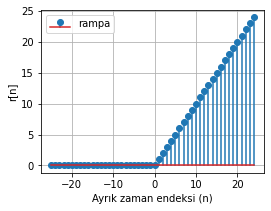

In [ ]:
# Örnek çözüm
N = 50
n = np.arange(- N / 2, N / 2)

rampa = np.zeros((N, ))
rampa[n >= 0] = n[n >= 0]

fig = plt.figure(figsize=(4,3))
plt.stem(n, rampa, label = 'rampa')
plt.grid()
plt.xlabel('Ayrık zaman endeksi (n)'); 
plt.ylabel('r[n]');
plt.legend();

Şekil 1.5: _Oluşturulan rampa sinyali_

**Not:** Yukarıdaki örneklerde ayrık zaman temsilini açıkça göstermek için stem-plot tercih ettik. Pratikte, elimizdeki sinyallerin tümünün ayrık zamanda sinyaller olduğunu bildiğimiz için veri noktaları arası çizgi kullanılarak oluşturulan çizimleri tercih ederiz. Özellikle ayrık zamanı göstermek istediğimiz durumlar dışında bundan sonraki örneklerimizde çizimleri bu şekilde yapacağız. 

**Egzersiz:**
[Pencere fonksiyonları](https://en.wikipedia.org/wiki/Window_function) (İng: windowing functions) temel sinyaller arasında yer almamakla beraber analiz sırasında yaygın olarak kullanılmaktadır. Bu sinyalleri de matematiksel tanımlarından yola çıkarak oluşturabilmemiz gerekecektir. 
Altta çizimi verilen üçgen pencere (İng: triangular window) sinyalini oluşturup çizdiren bir kod parçası yazınız.

<table>
  <thead>
    <tr>
      <th align="center">
        <img
          src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Window_function_and_its_Fourier_transform_%E2%80%93_Triangular_%28n_%3D_0...N%29.svg/960px-Window_function_and_its_Fourier_transform_%E2%80%93_Triangular_%28n_%3D_0...N%29.svg.png"
          width="350"
          height="200"
        />
      </th>
      <th align="center">
        <img
          src="https://wikimedia.org/api/rest_v1/media/math/render/svg/884ef77423e593a74ebf40ec3eaa0c8f00ca5102"
          width="250"
          height="100"
        />
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td colspan="2" align="center">
        Şekil 1.6: <em>Üçgen pencere ve genlik spektrumu</em>
      </td>
    </tr>
  </tbody>
</table>




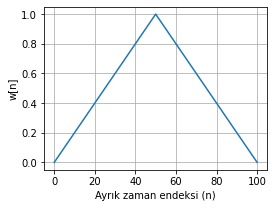

In [ ]:
# Örnek çözüm

N = 101
# N'nin tek veya çift olmasına göre orta nokta farklı olacak, bunu dikkate almalıyız 
#  Pencere tanımları tekil değildir ve uygulamaya/amaca göre farklı tanımlanabilir
#  Bu örnekte pencerenin sınır değerleri sıfır seçilmiştir
#  Bu şekilde tercih edilmeyen uygulamalar mevcuttur. 

yari_N = N // 2
if N % 2 == 0: # N'in çift olduğu durum
  ucgen_pencere = np.concatenate((np.linspace(0, 1, num=yari_N, endpoint=False), 
                               np.linspace(1-1/yari_N, 0, num=yari_N, endpoint=True)))
else: # N'in tek olduğu durum
  ucgen_pencere = np.concatenate((np.linspace(0, 1, num=yari_N, endpoint=False), 
                               np.linspace(1, 0, num=yari_N+1, endpoint=True)))

fig = plt.figure(figsize=(4,3))
plt.plot(np.arange(N), ucgen_pencere)
plt.xlabel('Ayrık zaman endeksi (n)'); plt.ylabel('w[n]');
plt.grid()

Şekil 1.7: *Oluşturulan üçgen pencere sinyali*

Pencere fonksiyonlarına ilerleyen kısımlarda ihtiyaç duyacağız. Yaygın kullanıldıklarından ötürü hazır kütüphaneler içerisinde bu pencerelerin oluşturulması için fonksiyonlar mevcuttur. Aşağıda [**Scipy** kütüphanesindeki fonksiyonlar](https://docs.scipy.org/doc/scipy/reference/signal.windows.html) kullanarak üç sık kullanılan pencere fonksiyonunu oluşturan ve üstüste çizdiren bir örnek sunuyoruz: 



<table>
  <thead>
    <tr>
      <th align="center">
        <img
          src="https://wikimedia.org/api/rest_v1/media/math/render/svg/cd8d3e844a1443d7bedd57240588cf19fcd28af1"
          width="250"
          height="100"
        />
      </th>
      <th align="center">
        <img
          src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Window_function_and_its_Fourier_transform_%E2%80%93_Hann_%28n_%3D_0...N%29.svg/960px-Window_function_and_its_Fourier_transform_%E2%80%93_Hann_%28n_%3D_0...N%29.svg.png"
          width="350"
          height="170"
        />
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td colspan="2" align="center">
        Şekil 1.8: <em>Hanning pencere ve genlik spektrumu</em>
      </td>
    </tr>
  </tbody>
</table>



In [ ]:
# Hanning fonksiyonunu denklemden yola çıkarak şu şekilde yazabiliriz
def hanning(N):
  n = np.arange(N)
  return 0.5*(1-np.cos(2*np.pi*n/N))

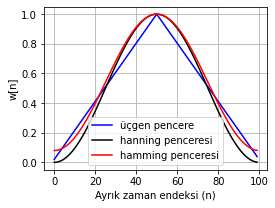

In [ ]:
# Hazır kütüphane fonksiyonlarını kullanmak istersek:
from scipy import signal
N = 100
triang_scipy = signal.get_window('triang', N) 
hann_scipy = signal.get_window('hann', N) 
hamming_scipy = signal.get_window('hamming', N) 
fig = plt.figure(figsize=(4,3))
n = np.arange(N)
plt.plot(n, triang_scipy, 'b', label = 'üçgen pencere')
plt.plot(n, hann_scipy, 'k', label = 'hanning penceresi')
plt.plot(n, hamming_scipy, 'r', label = 'hamming penceresi')
plt.grid()
plt.legend();
plt.xlabel('Ayrık zaman endeksi (n)'); plt.ylabel('w[n]');
plt.show()

Şekil 1.9: _`Scipy.signal` kütüphanesi ile oluşturulan çeşitli pencere sinyalleri/fonksiyonları: Üçgen pencere, Hanning penceresi, Hamming penceresi_

### Kompleks eksponansiyel sinyal
(İng: complex exponential signal)

Eksponansiyel sinyale bir örneği yukarıda oluşturmuştuk. Şimdi $\alpha$'yı kompleks bir değer alacak şekilde değiştirelim. İlk olarak normu 1'den küçük bir kompleks sayı kullanacağız: $\left | \alpha  \right | < 1$

In [ ]:
N = 80 # Oluşturacağımız sinyaldeki örnek sayısı
n = np.arange(- N / 2, N / 2) # Ayrık zaman endeks serisi

alfa = 0.95 + 0.2375j # Üstü alınacak alfa değeri
print('alfa = ', alfa, '|alfa| = ', abs(alfa))

exp_sig = np.power(alfa, n)
print('Sinyalin ilk 10 değeri:')
print(exp_sig[:10])

alfa =  (0.95+0.2375j) |alfa| =  0.9792375860841943
Sinyalin ilk 10 değeri:
[-2.15429311+0.84641635j -2.24760234+0.29245092j -2.20467931-0.25597719j
 -2.03365077-0.76678966j -1.74985568-1.21144224j -1.37464537-1.56646085j
 -0.93387865-1.81461608j -0.4562134 -1.94568146j  0.02869662-1.95674807j
  0.49198946-1.85209521j]


Elde ettiğimiz dizideki/sinyaldeki değerler kompleks. Gerçel ve sanal kısımlarını ayrı çizdirelim.

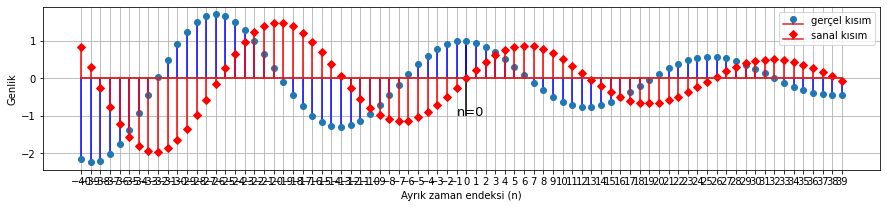

In [ ]:
fig = plt.figure(figsize=(15,3))
plt.stem(n, exp_sig.real, 'b', label = 'gerçel kısım')
plt.stem(n, exp_sig.imag, 'r', markerfmt='Dr', label = 'sanal kısım')
plt.vlines(0, -1, 1, colors='k', linestyles='solid') # n = 0 noktasını işaretlemek için çizgi ekleme
plt.text(-1, -1, "n=0", fontsize=13)
plt.xlabel('Ayrık zaman endeksi (n)'); plt.ylabel('Genlik');
plt.legend()
plt.grid()
plt.xticks(ticks=n);

Şekil 1.10: *Kompleks eksponansiyel sinyal ($\left | \alpha  \right | < 1$); gerçel ve sanal bileşenler*

**Gözlem:** $\alpha$ kompleks olduğunda osilasyon gözledik. 


Yukarıdaki çizimle gerçel ve sanal bileşenleri n'ye göre ayrı ayrı çizdirdik. Kompleks uzayda ardışık noktaların arasına çizgi çizerek de görselleştirebilirdik. Altta örneğini görelim.


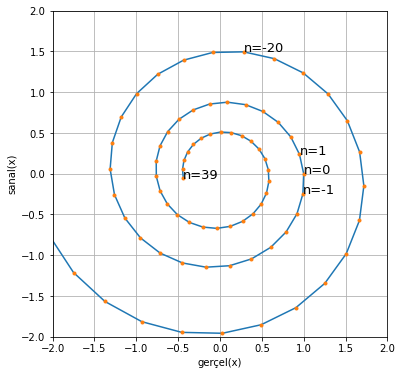

In [ ]:
# Kompleks uzayda çizim
fig = plt.figure(figsize=(6,6))
plt.plot(exp_sig.real, exp_sig.imag)
plt.plot(exp_sig.real, exp_sig.imag, '.')
plt.xlabel('gerçel(x)')
plt.ylabel('sanal(x)')
plt.ylim(-2,2);plt.xlim(-2,2)
plt.grid()
# Bazı noktaları işaretleyelim
for n_0 in [-1, 0, 1, int(n[0])//2, int(n[-1])]:
  plt.text(exp_sig.real[n==n_0], exp_sig.imag[n==n_0], "n="+str(n_0), fontsize=13)


Şekil 1.11: *Kompleks eksponansiyel sinyal ($\left | \alpha  \right | < 1$); gerçel ve sanal bileşenler*

**Gözlem:** $\alpha$ kompleks olduğunda kompleks uzayda bir dönme hareketi gözlüyoruz

**Peki eğer norm 1'den büyük olursa:  $\left | \alpha  \right | > 1$**

alfa =  (1.02375+0.13125j) |alfa| =  1.0321291706952187


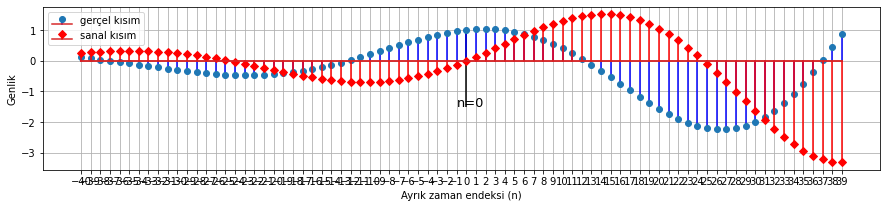

In [ ]:
alfa = 1.05 * (0.975 + 0.125j)
print('alfa = ', alfa, '|alfa| = ', abs(alfa))
exp_sig = np.power(alfa, n)

fig = plt.figure(figsize=(15,3))
plt.stem(n, exp_sig.real, 'b', label = 'gerçel kısım')
plt.stem(n, exp_sig.imag, 'r', markerfmt='Dr', label = 'sanal kısım')
plt.vlines(0, -1.5, 1, colors='k', linestyles='solid') # n = 0 noktasını işaretlemek için çizgi ekleme
plt.text(-1, -1.5, "n=0", fontsize=13)
plt.xlabel('Ayrık zaman endeksi (n)'); plt.ylabel('Genlik');
plt.legend()
plt.grid()
plt.xticks(ticks=n);

Şekil 1.12: *Kompleks eksponansiyel sinyal ($\left | \alpha  \right | > 1$); gerçel ve sanal bileşenler*

**Gözlem:** Yine osilasyon var, bu sefer genlik pozitif zaman yönünde artıyor

**Özel durum:** $\left | \alpha  \right | = 1$

alfa =  (0.9918816646858506+0.12716431598536546j) |alfa| =  1.0


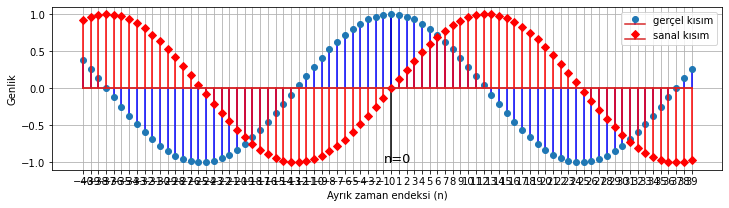

In [ ]:
# Kompleks sayıyı normuna bölerek normunun 1 olmasını sağlayalım
alfa = (0.975 + 0.125j) / abs(0.975 + 0.125j)
print('alfa = ', alfa, '|alfa| = ', abs(alfa))
exp_sig = np.power(alfa, n)

fig = plt.figure(figsize=(12,3))
plt.stem(n, exp_sig.real, 'b', label = 'gerçel kısım')
plt.stem(n, exp_sig.imag, 'r', markerfmt='Dr', label = 'sanal kısım')
plt.vlines(0, -1, 1, colors='k', linestyles='solid') # n = 0 noktasını işaretlemek için çizgi ekleme
plt.text(-1, -1.0, "n=0", fontsize=13)
plt.xlabel('Ayrık zaman endeksi (n)'); plt.ylabel('Genlik');
plt.legend()
plt.grid()
plt.xticks(ticks=n);

Şekil 1.13: *Kompleks eksponansiyel sinyal ($\left | \alpha  \right | = 1$); gerçel ve sanal bileşenler*

**Gözlem:** Sinüzoidal bileşenlerimiz oldu ve genlik zamanla değişmiyor

$\left | \alpha  \right | = 1$ ise $\alpha$'yı $e^{j\theta}$ olarak da yazabiliriz. Kodumuzu bu noktadan yola çıkarak da yazabilirdik.

In [ ]:
theta = np.angle(alfa)
print('theta = ', theta, 'rad')
# Yeniden oluşturup kontrol edelim
alfa_yeni = np.exp(complex(0, theta)) # e^(j*theta)
print(alfa_yeni)

theta =  0.12750955821523827 rad
(0.9918816646858506+0.12716431598536546j)


Kompleks alfa değerinin bir üst örnekte elde edilen (figürün hemen üzerinde yazdırılan) değerle aynı olduğunu görebiliriz. Euler formülü bu ilişkiyi ortaya koymaktadır:

Euler formulüne göre de $e^{j\theta} = cos\theta + jsin\theta$ olarak ifade edilebilir. 

| <img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Euler%27s_formula.svg/440px-Euler%27s_formula.svg.png" width=250 /> |
| :---------------------------------------------------------------------------------------------------------------------------------------: |
|                                                       Şekil 1.14: _Euler dönüşümü_                                                        |



Yukarıda oluşturduğumuz $x[n] = \alpha^n$ sinyali bu durumda $x[n] = {e^{j\theta}}^n = cos\theta n + jsin\theta n$ olarak yazılabilir. Şimdi sinyalimizin iki bileşeni açıklık kazandı. Gerçel kısmı bir kosinüs sinyali (n=0'da 1 değeri alıyor), sanal kısmı ise bir sinüs sinyali (n=0'da 0 değeri alıyor)


Euler denklemini kullanarak sinüs ve kosinüs sinyallerini eksponansiyel üstel sinyallerden elde edebiliriz:

$$x[n] = {e^{j\theta n}} = \cos{\theta n} + j\sin{\theta n}$$

$$\cos{\theta n} = \frac{{e^{j\theta n}} + {e^{-j\theta n}}}{2}$$

$$\sin{\theta n} = \frac{{e^{j\theta n}} - {e^{-j\theta n}}}{2j}$$

Kosinüs sinyalini eksponansiyel sinyallerden (en alttaki formülle) oluşturmayı deneyelim. 

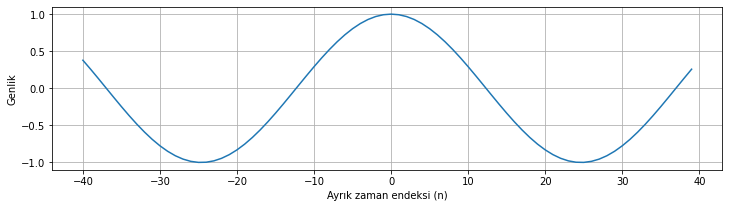

In [ ]:
# Yukarıda alfa'nın açısı olarak elde ettiğimiz theta'yı kullanalım
x = (np.exp((0+1j) * theta * n) + np.exp((0-1j) * theta * n))/2
fig = plt.figure(figsize=(12,3))
plt.plot(n, x)
plt.ylabel('Genlik');plt.xlabel('Ayrık zaman endeksi (n)')
plt.grid();plt.show()

Şekil 1.15: *$\frac{{e^{j\theta n}} + {e^{-j\theta n}}}{2}$ sinyali*

Kosinüs sinyalini elde etmiş olduk. Bunu eksponansiyel/üstel sinyal ile sinüzoid sinyaller arasındaki ilişkiye değinmek için bu şekilde yaptık. Sinüzoidal sinyalin yaygın kullanılan tanımını doğrudan kullanabilirdik. 

### Sinüzoid sinyaller, frekans, periyod
(İng: sinusoidal signals, frequency, period)

**Okuma:** [Neden sinuzoidler önemlidir?, Julius Orion Smith III](https://ccrma.stanford.edu/~jos/mdft/Why_Sinusoids_Important.html)

Bir [sinüzoidal sinyalin](https://en.wikipedia.org/wiki/Sine_wave) yaygın kullanan tanımını ele alırsak 
sinyalin genlik ($A$), frekans ($f$) ve faz ($\theta$) gibi üç temel parametresi olduğunu görürüz. 

$$x(t) = Asin(2\pi ft+\theta)$$

Burada $t$ sürekli zaman değişkenidir ve saniye birimindedir. $f$ saniyedeki tekrar sayısı olan frekansa karşılık gelmekte olup birimi Hz'dir. 



**Şimdi önemli bir adım atalım:** belirli bir frekansta ve uzunlukta/sürede bir sinüzoidal sinyal oluşturup dinlemek isteyebiliriz. Frekansı uygun aralıkta seçtiğinizde laptop hoparlörünüzden duyabileceğiniz bir ses sinyali oluşturabilirsiniz. (Duyabildiğimiz *teorik* frekans aralığı 20Hz-20kHz olmakla beraber (eğer genç bir kadın değilseniz) muhtemelen üst sınırınız 20kHz'in altındadır ve laptop hoparlörünüzle çok düşük frekanslarda duyabileceğiniz şiddette ses de oluşturamayacaksınızdır. Uygun değerleri deneme yanılma yoluyla bulabiliriz. Ama dikkat: **deneyleriniz sırasında sesi açıp kulaklık kullanmak risklidir, kulağınızın hassas olduğu frekanslarda çok şiddetli bir sese maruz kalabilirsiniz. Bu deneylerde ses çıkış seviyesini en yükseğin %30'una almanızı öneririz**.

Sürekli zamanda sinyal oluşturamayacağımız için ayrık zaman üzerinden düşünmeliyiz. Bunun için saniyede kaç örnek kullanacağımıza karar vermeliyiz (bu büyüklüğe  **örnekleme frekansı** (İng: sapling rate/frequency) adı verilip yine Hz cinsinden ifade edilir). Örneğin ses CD formatı örnekleme frekansı olan 44100Hz'i kullanalım. Ve 0.5 saniye uzunluğunda bir sinyal oluşturmayı hedefleyelim. Bu durumda zamanda ayrık noktaların kaçıncı saniyelere geldiğini (denklemde kullanacağımız t değerlerini) bir dizi içerisine yerleştirip kodumuzda bu diziyi kullanabiliriz.


In [ ]:
ornekleme_frekansi = 44100
sure = 0.5 # Saniye cinsinden süre
# 0-1 saniye arasında örnekleme_frekansı adet değer oluşturabiliriz (0.5 saniyede ise 0.5*ornekleme_frekansi adet)
t = np.linspace(0, sure, num=int(sure*ornekleme_frekansi), endpoint=False)
# Veya daha yaygın kullanılan alternatif (sadece sureyi değiştirmemiz yeterli olacak )
t = np.arange(0, sure, 1/ornekleme_frekansi) # 0-sure arasında 1/ornekleme_frekansi adımlarla değerler al
print("t'nin ilk 4 değeri:", t[:4], ", son değeri:",t[-1])

t'nin ilk 4 değeri: [0.00000000e+00 2.26757370e-05 4.53514739e-05 6.80272109e-05] , son değeri: 0.49997732426303854


Artık sinüzoidin diğer parametrelerini de tanımlayıp sinyalimizi sentezleyebiliriz:

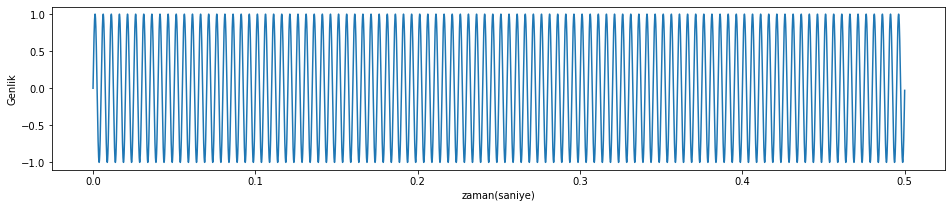

In [ ]:
A = 1 # Sinyal genliği
f = 200 # Sinyal frekansı
theta = 0 # Açı; t=0'da fazın ne olduğunu belirler 
x = A * np.sin(2 * np.pi * f * t + theta)
fig = plt.figure(figsize=(16,3))
plt.plot(t, x)
plt.ylabel('Genlik');plt.xlabel('zaman(saniye)')
plt.show()

Şekil 1.16: *Sinüzoidal sinyal örneği. Örnekleme frekansı : 44100Hz , temel titreşim frekansı: 200 Hz, süre/uzunluk: 0.5 saniye*

In [ ]:
# Oluşturduğumuz sesi Jupyter defteri içerisine çalınabilir ses içeriği olarak ekleyelim 
IPython.display.Audio(x, rate=ornekleme_frekansi)

Yukarıdaki üçgene (Play/Çal butonuna ) tıklayarak oluşturduğumuz 200Hz frekanslı sesi dinleyebilirsiniz.

Sinüzoidalin parametrelerinin sinyale etkisini alttaki interaktif çıktıyı kullanarak (slider'lardaki topları kaydırarak oluşan dalga formunu gözleyerek) inceleyebilirsiniz.

In [ ]:
#Etkileşim araçlarıyla sinyal sentezleme fonksiyonu
def plot_sine(A = FloatSlider(min=0.1, max=1, step=0.1, value=0.5), 
              f0 = FloatSlider(min=100, max=2000, step=1, value=500), 
              phi = FloatSlider(min=-np.pi, max=np.pi, step=0.1)):
  fs = 10000 #örnekleme frekansı için seçilen değer
  T = 1 / fs #örnekleme periyodu
  n = np.arange(50) #ayrık zaman endeks serisi
  t = n * T #sürekli zaman serisi
  x = A * np.cos(2 * np.pi * f0 * t + phi) #sinyal oluşturma
  
  fig = plt.figure(figsize=(12,3))
  plt.plot(t, x)
  plt.plot(t, x, 'r.')#kırmızı noktalar eklenmesi
  plt.ylim(-1,1)
  plt.grid()
  plt.ylabel('Genlik')
  plt.xlabel('Zaman (saniye)')
  plt.show()

#Fonksiyonun çağırılması
interact(plot_sine);


interactive(children=(FloatSlider(value=0.5, description='A', max=1.0, min=0.1), FloatSlider(value=500.0, desc…

Şekil 1.17: Genlik, frekans ve fazı değiştirilebilen sinüzoidal sinyal. *(Bu figür etkilişimlidir. Html sürümünde etkileşim çalışmayabilir. Etkilişimi kullanabilmek için Jupyter defterini çalıştırmanız gerekebilir.)*

In [ ]:
# Aşağıdaki kodda parametreleri değiştirip oluşan sinyali dinleyiniz
fs = 44100 # Örnekleme frekansı (fs: frequency of sampling)
f0 = 300 # Sinus dalgasının temel titreşim frekansı
sure = 2 # Süre 2 saniye
t = np.arange(0, sure, 1/fs)
x = np.cos(2 * np.pi * f0 * t )
IPython.display.Audio(x, rate=fs)


**Egzersiz:**
Örnekleme frekansının 10kHz, sinyal frekansının 200Hz olarak verildiği durumda tam 5 periyot uzunluğunda bir sinüzoidal sinyal oluşturup çizdiren bir kod parçası yazınız.


Periyod =  50.0 örnek,  0.005 saniye


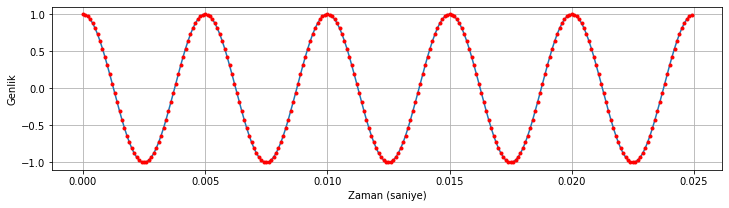

In [ ]:
# Örnek çözüm
fs = 10000
f0 = 200
T = 1 / fs
T0 = fs / f0 # Örnek sayısı cinsinden dalga boyu (periyod)
print('Periyod = ', T0, 'örnek, ',1/f0, 'saniye')
n = np.arange(T0 * 5) # 5 periyod uzunluğunda ayrık zaman endeks serisi oluşturulması
t = n * T
theta = 0; A = 1
x = A * np.cos(2 * np.pi * f0 * t + theta)

fig = plt.figure(figsize=(12,3))
plt.plot(t, x)
plt.plot(t, x, 'r.')
plt.grid()
plt.ylabel('Genlik')
plt.xlabel('Zaman (saniye)')
plt.show()

Şekil 1.18: *5 periyot uzunluğunda bir sinüzoidal sinyal*

**Egzersiz:**
Bir ses sinyalinin küçük bir parçası üzerinde yapılan gözlemde dalga boyut 50 örnek olarak gözlenmiştir. Örnekleme frekansı 24kHz ise, sinyalin frekansı nedir?


### Birden fazla osilasyon içeren sinyaller

Yukarıda temel sinyallerle ilgili özetimizi tamamlamış olduk. İnceleyeceğimiz sinyalleri bu temel sinyallerin toplamı şeklinde ifade ediyor olacağız. Bir sonraki örnekte 3 sinüzoidin toplamından sentezlenen bir sinyali ele alacağız. Sinüzoidleri 400Hz, 800Hz ve 1200Hz'te oluşturup toplayacağız. 

Defterin ilerleyen bölümünde bir toplam sinyali verildiğinde ters problem olan sinyalin bileşenlerine ayırılması problemini de ele alacağız.  

Genlik ve Faz Sepektrumu, fs =  10000 , f0 = 400


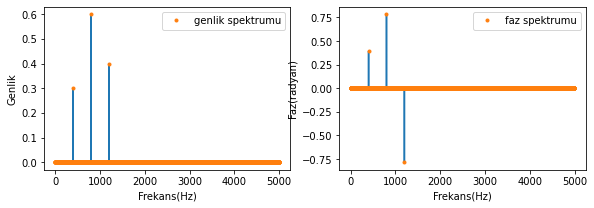

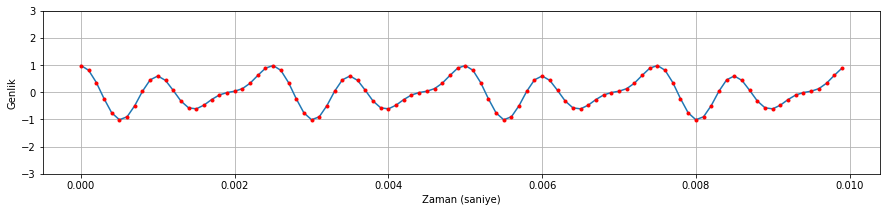

In [ ]:
# Keyfi olarak seçilen bazı parametreler
fs = 10000 # örnekleme frekansı (Hz)
f0 = 400 # temel titreşim frekansı (Hz)
# Sinüzoidlerin genlik ve faz değerleri (3 sinüzoide dair değerler dizilerde tutuluyor)
A = np.array([0.3, 0.6, 0.4])
phi = np.array([np.pi/8, np.pi/4, -np.pi/4])

# Seçtiğimiz değerleri görselleştirelim
#  Genlik değerlerini frekansa göre çizdirelim
#  Faz değerlerini frekansa göre çizdirelim
#  Bu tür (frekansa göre değişimin gösterildiği) çizimlere 'spektrum' ismini vereceğiz
genlik_spek = np.zeros((fs // 2, ))
genlik_spek[f0 * np.array([1,2,3])] = A
faz_spek = np.zeros((fs // 2, ))
faz_spek[f0 * np.array([1,2,3])] = phi

print('Genlik ve Faz Sepektrumu, fs = ', fs, ', f0 =', f0)
fig = plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,3,1)   
ax2 = plt.subplot(1,3,2)
ax1.plot(genlik_spek);ax1.plot(genlik_spek, '.', label = 'genlik spektrumu')
ax2.plot(faz_spek);ax2.plot(faz_spek, '.', label = 'faz spektrumu')
ax1.set_xlabel('Frekans(Hz)');ax1.set_ylabel('Genlik');
ax2.set_xlabel('Frekans(Hz)');ax2.set_ylabel('Faz(radyan)');
ax1.legend();ax2.legend();

T = 1 / fs # örnekleme periyodu (saniye cinsinden): ardışık örnekler arası süre
n = np.arange(100)
t = n * T
# İçi sıfırlarla dolu bir sinyal oluşturup bunun üzerine sinüs sinyallerini 
#  toplayalım. Bu şekilde birden fazla osilasyon çeren bir sinyalimiz olacak
x = np.zeros_like(t) # t uzunluğunda içi sıfırlarla dolu bir vektörün yaratılması
for k in [1, 2, 3]:  # her döngüde bir sinüs oluşturulup sinyale eklenmesi
  x += A[k-1] * np.cos(2 * np.pi * (k * f0) * t + phi[k-1])

fig = plt.figure(figsize=(15,3))
plt.plot(t, x)
plt.plot(t, x, 'r.')
plt.ylim(-3,3)
plt.grid()
plt.ylabel('Genlik')
plt.xlabel('Zaman (saniye)')
plt.show()

Şekil 1.19: *3 sinüzoidalin toplamı şeklinde sentezlenen sinyal(alt şekil) ve sinüzoidal bileşenlerin genlikleri ve fazları (üst şekiller)*

## Temel işlemlere giriş

Sinyal işlemede üç tür çarpma işlemi çok temel bir yer teşkil etmektedir:
*   Sinyallerin/vektörlerin skaler çarpımı
*   Sinyallerin/vektörlerin eleman-elemana çarpımı
*   Polinom çarpımı veya diğer adıyla konvolüsyon.

Şimdi bunları ele alalım ve kullanımlarını örneklendirelim. 



### Skaler çarpım
(İng: dot product)

**Vektörlerin/sinyallerin skaler çarpımı:**

Yukarıdaki örnekte ilk analiz probleminden bahsetmiş olduk: bir sinyal verildiğinde onu bileşenlerine ayırma işlemi. Bu noktada lineer cebir dersinden bildiğimiz vektör işlemleri yardımımıza yetişecek. Nasıl mı? Verilen herhangi bir vektörü nasıl birim vektörlerin bileşimi cinsinden yazabiliyorsak sinyalleri de _birim sinyallerin toplamı_ şeklinde yazabileceğiz. Bir vektörün birim vektörlere bölünmesi işlemini, vektörün birim vektörler yönündeki izdüşümlerini bularak (bunun için de vektör ile birim vektörü skaler çarparak) gerçekleştirebiliriz. Benzer şekilde sinyalleri birim sinyaller cinsinden yazarken de benzer bir vektör çarpım işlemini kullanacağız. Öncelikle 2 boyutlu uzayda verilen vektörün birim vektörler cinsinden yazılmasını ele alalım.

İki boyutlu uzayda bir $\overrightarrow{a}$ vektörünü ele alalım. Bu vektörü $\overrightarrow{e_i}= [1, 0]$  ve $\overrightarrow{e_j}= [0, 1]$ taban vektörlerinin bileşimi şeklinde yazabiliriz. 

| <img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Vector_components_in_an_orthonormal_basis.png/440px-Vector_components_in_an_orthonormal_basis.png" width=350 /> |
| :-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: |
|                                                          Şekil 1.20: _İki boyutlu uzayda bir vektör ve birim baz vektörleri_                                                          |


Genel ifadesiyle $\overrightarrow{a}$ vektörünü $\overrightarrow{e_k}$ baz vektörlerinin ağırlıklı toplamı olarak yazabiliriz: 

$$\overrightarrow{a} = \sum_{k}^{}a_k\overrightarrow{e_k}$$

Burada $a_k$ skaler bir değer olup $\overrightarrow{a}$ vektörünün $\overrightarrow{e_k}$ vektörü'ne izdüşümü boyutundadır ve ağırlıklı toplamdaki çarpanlara karşılık gelmektedir. 

In [ ]:
# Örnek vektör
a = np.array([6, 2])
# Taban vektörleri
e_i = np.array([1, 0]) 
e_j = np.array([0, 1])
# a vektörünün taban vektörleri cinsinden ifadesi
a_temsil = 6 * e_i + 2 * e_j
# Karşılaştırma
print('a vektörü:', a, 'baz vektörleri toplamı şeklinde ifadesi:', a_temsil)

a vektörü: [6 2] baz vektörleri toplamı şeklinde ifadesi: [6 2]


Vektörü baz vektörleri toplamı şeklinde yazabileceğimizi bir örnek üzerinde gördük, şimdi koda elle yazdığımız çarpanları (6 ve 2) bulan bir program yazalım. Bunun için vektörün birim taban vektörü yönündeki izdüşümünü bulmamızı sağlayan skaler çarpımı ([*dot product*](https://en.wikipedia.org/wiki/Dot_product)) kullanacağız.  

$$\overrightarrow{A}.\overrightarrow{B} = \sum_{i=1}^{n} A_iB_i = A_1B_1 + A_2B_2 + ... + A_nB_n$$ 

| <img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Dot_Product.svg/440px-Dot_Product.svg.png" width=200 /> |
| :---------------------------------------------------------------------------------------------------------------------------: |
|                               Şekil 1.21: _Vektörlerin skaler çarpımı ile izdüşüm hesaplanması_                               |


In [ ]:
#Yukarıdaki formülden yola çıkarak skaler çarpımı yazalım
def skaler_carpim(A, B):
  if len(A) != len(B):
    print("Vektörlerin skaler çarpımı yapılabilmesi için boyutları aynı olmalı")
    return -1 # Hata olduğunu temsilen -1 değeri döndürelim
  toplam = 0
  for a_i, b_i in zip(A, B):
    toplam += a_i * b_i
  return toplam

$\overrightarrow{a}$ vektörünün $\overrightarrow{e_k}$ baz vektörleri (İng: basis vectors) cinsinden yazılabilmesi için $\overrightarrow{e_i}$ ve $\overrightarrow{e_j}$ vektörlerine izdüşümlerin hesaplanması (bu işleme "analiz işlemi" diyebiliriz, çünkü sinyalimizi bileşenlerine ayırma yönünde attığımız bir adım bu)

In [ ]:
# Analiz işlemi:
a_i = skaler_carpim(a, e_i) 
a_j = skaler_carpim(a, e_j) 
# Numpy kütüphanesinin hazır fonksiyonlarını kullanmak istersek:
# a_i = np.dot(a, e_i)
# a_j = np.dot(a, e_j)
print('a vektörünün baz vektörler cinsinden temsili = ', a_i, '* e_i + ', a_j, '* e_j')

a vektörünün baz vektörler cinsinden temsili =  6 * e_i +  2 * e_j


Vektörün baz vektörüne dik olması durumunda izdüşümü sıfır olacaktır. Skaler çarpımı, iki vektörün dik olup olmadığını kontrol etmek için kullanabiliriz. Örneğin elimizdeki baz vektörlerinin ($\overrightarrow{e_i}= [1, 0]$  ve $\overrightarrow{e_i}= [0, 1]$) dikliğini kontrol edelim

In [ ]:
e_inin_izdusumu = skaler_carpim(e_i, e_j)
print("e_i'nin e_j'ye izdüşümü:", e_inin_izdusumu)
if e_inin_izdusumu == 0:
  print('Vektörler dik')
else:
  print('Vektörler dik değil')

e_i'nin e_j'ye izdüşümü: 0
Vektörler dik


Şimdi bir sinyalin bileşenlerinin toplamı şeklinde ifadesine ve sinyalden yola çıkarak bileşenlerin genliklerinin bulunması analiz problemine geçebiliriz. Örneğin elimizdeki bir sinyali (vektör olarak da düşünebiliriz) bir dizi sinüzoidal sinyalin(baz vektörleri) toplamı şeklinde yazmak istediğimizi düşünelim:

$$ x[n] = \sum_{k}^{}a_ksin(\phi_k(n))$$

$$\phi_k(n) = 2\pi f_k t + \theta_k$$

burada $sin(\phi_k(n))$'i $k.$ baz vektörü olarak tanımlamış olduk. Acaba bu şekilde seçtiğimiz baz vektörleri birbirine dik olabilir mi? Küçük deney yapalım, örneğin 100Hz ve 200Hz'te iki sinüzoidal sinyalin skaler çarpımına bakalım: 

In [ ]:
t = n * T
sig_100Hz = np.sin(2 * np.pi * 100 * t )
sig_200Hz = np.sin(2 * np.pi * 200 * t )
np.dot(sig_100Hz, sig_200Hz)

1.4085954624931674e-15

Pratik olarak sıfır elde ettik. Deneyimizi bir adım öne taşıyalım. Örneğin 10kHz örnekleme frekansında, k. baz vektörü k*100Hz frekansında olmak üzere, bir dizi baz vektörü oluşturup bütün baz vektörlerinin ikili skaler çarpımını hesaplayalım ve elde ettiğimiz değerleri bir matriste toplayıp görselleştirelim. 

Baz vektörlerinin/sinyallerinin ikili skaler çarpım matrisi değerleri:
50.00	0.00	-0.00	-0.00	-0.00	-0.00	-0.00	0.00	-0.00	0.00	
0.00	50.00	-0.00	-0.00	-0.00	-0.00	-0.00	-0.00	0.00	-0.00	
-0.00	-0.00	50.00	0.00	-0.00	0.00	-0.00	-0.00	-0.00	-0.00	
-0.00	-0.00	0.00	50.00	-0.00	-0.00	-0.00	-0.00	-0.00	-0.00	
-0.00	-0.00	-0.00	-0.00	50.00	0.00	-0.00	0.00	0.00	-0.00	
-0.00	-0.00	0.00	-0.00	0.00	50.00	-0.00	0.00	0.00	-0.00	
-0.00	-0.00	-0.00	-0.00	-0.00	-0.00	50.00	0.00	0.00	-0.00	
0.00	-0.00	-0.00	-0.00	0.00	0.00	0.00	50.00	-0.00	-0.00	
-0.00	0.00	-0.00	-0.00	0.00	0.00	0.00	-0.00	50.00	-0.00	
0.00	-0.00	-0.00	-0.00	-0.00	-0.00	-0.00	-0.00	-0.00	50.00	


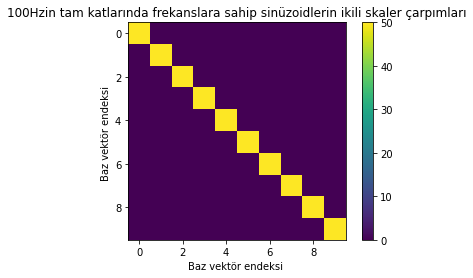

In [ ]:
fs = 10000;f0 = 100
T = 1 / fs; T0 = fs/f0
t = np.arange(T0) * T # Sinyallerimiz 100Hz'lik sinyalin 1 periyodu uzunluğunda olsun

baz_vektor_sayisi = 10
skaler_carpim_matrisi = np.zeros((baz_vektor_sayisi, baz_vektor_sayisi))

for i in range(1, baz_vektor_sayisi + 1):
  baz_vektor_i = np.cos(2 * np.pi * (i * f0) * t )
  for j in range(1, baz_vektor_sayisi + 1):
    baz_vektor_j = np.cos(2 * np.pi * (j * f0) * t )
    skaler_carpim_matrisi[i-1,j-1] = np.dot(baz_vektor_i, baz_vektor_j)

# Matrisin ekrana yazdırılması
print('Baz vektörlerinin/sinyallerinin ikili skaler çarpım matrisi değerleri:')
for i in range(skaler_carpim_matrisi.shape[0]):
  satir = ''
  for j in range(skaler_carpim_matrisi.shape[1]):
    satir += '{:.2f}\t'.format(skaler_carpim_matrisi[i,j])
  print(satir)

# Matrisin görselleştirilmesi
plt.imshow(skaler_carpim_matrisi)
plt.colorbar();
plt.title("100Hzin tam katlarında frekanslara sahip sinüzoidlerin ikili skaler çarpımları")
plt.xlabel('Baz vektör endeksi ');
plt.ylabel('Baz vektör endeksi ');

Şekil 1.22: *Sinüzoidal baz vektörlerinin/sinyallerinin karşılıklı skaler çarpımları sonucu elde edilen matris (yüksek değerler sarı, düşük değerler lacivert olarak renklendirilmiştir)*

**Gözlem:** Her bir baz vektörünün diğer baz vektörüleriyle skaler çarpımı sıfır verdi. Vektörün kendisi ile çarpımı ise normunun karesini verecektir. 

$$\overrightarrow{a}.\overrightarrow{a} = \| a \|^2$$

Bu örneğimizde baz vektörünün kendisiyle skaler çarpımını hesapladığımızda bu bize sinyaldeki değerlerin kareleri toplamı olan bir değer vermiş oldu.


**Skaler çarpımın sinyal analizinde kullanım örneği:**

Şimdi deneyimizi bir adım daha öteye taşıyalım: acaba verilen bir sinyali(kontrollü deney olması için  sinüzoidlerden oluşturalım) bu baz vektörlerinin toplamı şeklinde ifade edebilir miyiz? her bir baz vektörü yönünde izdüşümü skaler çarpım ile bulabilir miyiz? 

Sinyalimizi şu sinyalin örneklenmiş hali olarak oluşturalım:

$$x(t) = 0.3 sin(2\pi200t) + 0.6 sin(2\pi300t) + 0.4 sin(2\pi500t)$$

Baz vektörlerimizi de 100Hz'in katlarında sinüzoidler olarak seçelim:
$$e_k(t) = sin(2\pi k100t)$$

Sinyalimizi bu baz vektörleri ile skaler çarpıma tabi tutup izdüşümleri hesaplayalım. Şunu merak ediyoruz: yukarıdaki vektör işlemlerinde olduğu gibi skaler çarpım ile sinyali baz sinyallerinin toplamı şeklinde yazabilmek için gerekli skaler çarpanları elde edebiliyor muyuz? Bu soruyu, sinyalin ilk tanımında kullanılan katsayılarla hesapladığımız katsayıları karşılaştırarak cevaplamaya çalışacağız.

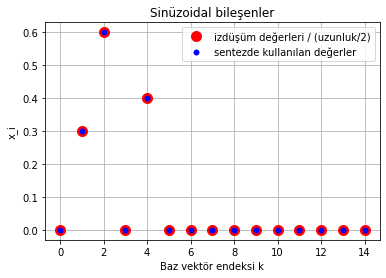

In [ ]:
fs = 10000;f0 = 100
# Sinyalimizin genlikleri: 0 olan yerlerde bileşen yok, k=2,3 ve 5'te bileşenler mevcut
A = np.array([0, 0.3, 0.6, 0, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # Sentez sırasında kullanılan genlikler
sinyal_uzunlugu = 300 # rasgele seçildi
T = 1 / fs
n = np.arange(sinyal_uzunlugu)
t = n * T
# Sinyalimizin kümülatif toplam ile sentezlenmesi
#  sıfırlardan ibaret bir vektör oluşturup bileşenleri üzerine toplayacağız
x = np.zeros_like(t)
for k in range(len(A)):
  x += A[k] * np.cos(2 * np.pi * (k * f0) * t )

# Analiz adımları 
baz_vektor_sayisi = 15 # Analizimizde 15 adet baz vektörü kullanalım
# Skaler çarpımla elde edeceğimiz izdüşüm değerlerini bir vektörde (kestirilen_A) toplayalım
kestirilen_A = np.zeros((baz_vektor_sayisi, ))
for k in range(baz_vektor_sayisi):
  baz_vektor_k = np.cos(2 * np.pi * (k * f0) * t ) # baz sinyalinin oluşturulması
  kestirilen_A[k] = np.dot(x, baz_vektor_k) # izdüşüm hesabı bu adımda gerçekleştiriliyor: analiz sonucu elde edilen genlikler

# Analiz sonucu elde ettiğimiz değerler ile sentez sırasında kullanılan değerleri karşılaştıralım:
plt.plot(kestirilen_A / (t.size / 2), 'ro', markersize=10, label = 'izdüşüm değerleri / (uzunluk/2)')
plt.plot(A , 'b.', markersize=10, label = 'sentezde kullanılan değerler')
plt.title('Sinüzoidal bileşenler')
plt.xlabel('Baz vektör endeksi k')
plt.ylabel('x_i')
plt.legend();
plt.grid();

Şekil 1.23: *Sinyali sentezlerken kullanılan genlikler ile analizle kestirilen değerlerin karşılaştırılması*

Skaler çarpım ile elde edilen, sinyaldeki bileşenlerin büyüklükleri(hesaplanan değerler) ile sinyali oluştururken kullandığımız değerler(çizimde noktalar üstüste denk gelerek) örtüştü. Diğer bir deyişle: sinyali oluştururken kullanılan büyüklükleri toplam sinyalini analize tabi tutarak (baz vektörleriyle skaler çarparak) elde edebildik. O zaman doğadan kaydettiğimiz herhangi bir sinyali de bu şekilde bileşenlere ayırabiliriz. 

**Fourier Dönüşümü:** Bu örnekte bir sinyalin baz vektörleri/sinyalleri tarafından ifadesinin skaler çarpım ile elde edilebileceğini gördük. Bu, bizim sinyal işlemede çok sık başvuracağımız bir işlem olacak. Kullandığımız dönüşümler temelde bu işleme dayanacak. Örneğin Ayrık Zaman Fourier Dönüşümü ([Discrete Time Fourier Transform](https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform)):

$$X(\omega) = \sum_{n = -\infty}^{\infty}x[n]e^{-j\omega n}$$

tanımında baz vektörlerimiz/sinyallerimiz $e^{-j\omega n}$, hesaplanan izdüşüm ise $X(\omega)$ olarak ifade edilmiş oldu. Her bir $\omega$ değeri için bir baz vektörü/sinyali mevcut ve bu baz vektörü ile eldeki sinyal skaler çarpma ile çarpıldığında sinyalin bu baz vektörü üzerine izdüşümünün büyüklüğü (bir diğer ifade ile sinyalin içerisinde o frekanstaki bileşenin büyüklüğü/genliği) hesaplanıyor. İşin ilginç yönlerinden biri de $X(\omega)$ değerinin kompleks olması; genlik ve fazının sinyal bileşeninin genliği ve fazıyla doğrudan ilişkili olmasıdır.

Fourier dönüşümü birçok ders ve kitapta detaylı olarak konu edildiği için burada açıklamaya girişmeyeceğiz. İleride spektrumda gözlemlediklerimizi anlamlandırmamızı kolaylaştırmayı amaçlayan defterlerimiz var ancak orada da dönüşüm işleminin detaylarına girmeyeceğiz. Bu konuda varolan kaynakları inceleyebilirsiniz. Bizim önerdiklerimiz:


*   [Fourier Analysis by Steve Brunton](https://www.youtube.com/playlist?list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC)  
*   [Audio signal processing for music applications by Xavier Serra](https://www.youtube.com/playlist?list=PLlhCtf5DUJCb0uEuO_fw7k-QfpNkH-_uJ)



**Fourier dönüşüm polinomu ?!**

Bu toplam ifadesinin terimlerini yazıp incelediğimizde aslında bir polinom olduğunu farkederiz. Örneğin sınırlı uzunlukta (4 örnek içeren) bir $x[n]$ sinyali alalım: $x = [x[0], x[1], x[2], x[3]]$. $X(w)$'nın terimlerini yazarsak;

$X(\omega) = \sum_{n = 0}^{3}x[n]e^{-j\omega n}$

$ = x[0]e^{-j0\omega} + x[1]e^{-j1\omega} + x[2]e^{-j2\omega} + x[3]e^{-j3\omega}$

$ = x[0] + x[1](e^{j\omega})^{-1} + x[2](e^{j\omega})^{-2} + x[3](e^{j\omega})^{-3}$

Değişken dönüşümü yaptığımızda bunun bir polinom olduğunu görmek kolaylaşacak;

$z = e^{j\omega}$ alırsak;
$X(z) = x[0] + x[1](z)^{-1} + x[2](z)^{-2} + x[3](z)^{-3}$

Daha genel ifadesiyle;

$$X(z) = \sum_{n = -\infty}^{\infty}x[n]z^{-n}$$

Bu dönüşüme [Z-transform](https://en.wikipedia.org/wiki/Z-transform) adı verilmekte ve temelde toplam şeklinde yazılmış bir polinomu ifade etmektedir; öyle bir polinom ki katsayıları sayısal sinyalimizin örnekleri. 


Şimdi yukarıda sinüsler toplamı şeklinde sentezlediğimiz örneğe (Şekil 1.19) tekrar dönelim. 100Hz'in tam katı frekanslara sahip sinüs sinyallerini baz vektörleri olarak kullanıp sinyalle skaler çarpmış ve izdüşümler hesaplamıştık. Bu şekilde sinyali baz vektörleri cinsinden yazabildiğimizi, analizle gerçek değerlere ulaşabildiğimizi görmüştük (Şekil 1.23). Bu sinyalin Fourier dönüşümünü hesaplayıp inceleyelim. Bu hesabı yukarıdaki polinom bakış açısını ve numpy kütüphanesinde verilen bir polinomun bir noktadaki değerini hesaplayan [numpy.polynomial.polynomial](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.html) fonksiyonu yardımıyla yapacağız. 

İlk olarak [numpy.polynomial.polynomial](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.html) fonksiyonunun kullanımına örnek verelim:

$P(z) = 1-z+2z^2$ polinomunun $z=3$'teki ve $z=4$'teki değerini hesaplayıp yazdıralım. Hesabın şu sonuçları vermesini bekliyoruz:
$P(3) = 1 + (-1) \times 3 + 2 \times 3^2 = 16$, $P(4) = 1 + (-1) \times 4 + 2\times 4^2 = 29$

In [ ]:
from numpy.polynomial.polynomial import polyval as np_polyval
np_polyval([3, 4], [1,-1,2]) # ilk girdi: z değerleri, ikinci girdi: polinom katsayıları

array([16., 29.])

Sinyalimizin sınırlı uzunluğa sahip olduğunu ve değerlerin pozitif zamanda olduğunu varsayalım.

$$X(\omega) = \sum_{n = 0}^{N}x[n]e^{-j\omega n} = \sum_{n = 0}^{N}x[n](e^{-j\omega})^n$$

`np_polyval` fonksiyonu ile $X(w)$'yı hesaplamak için fonksiyonun ilk girdisi $e^{-j\omega}$, ikinci girdisi $x[n]$ vektörü olarak verilebilir.

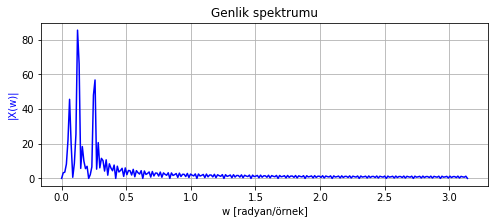

In [ ]:
def frekans_cevabi_cizdir(x_n, frekans_nokta_sayisi=256):
  # w değerlerini 0-pi arası alalım (bunun sebebini daha sonra açıklayacağız)
  w = np.linspace(0, np.pi, num=frekans_nokta_sayisi, endpoint=True)
  X_w = np_polyval(np.exp(-1j * w), x_n)
  genlik_w = abs(X_w)
  plt.figure(figsize=(8,3))
  plt.title('Genlik spektrumu')
  plt.plot(w, genlik_w, 'b')
  plt.ylabel('|X(w)|', color='b')
  plt.xlabel('w [radyan/örnek]')
  plt.grid()
  plt.show()
# Çizdirme fonksiyonunu çağıralım:
frekans_cevabi_cizdir(x)

Şekil 1.24: *$X(w)$ polinomunun w'ya göre aldığı değerler (kompleks olan değerlerin sadece genlikleri çizdirilmiştir)*


Şekil 1.19, 1.23 ve 1.24'ü karşılaştırdığımızda Fourier dönüşümü hesabı ile elde ettiğimiz genlik spektrumunda da sinyali sentezlerken kullanılan 3 sinüzoidal bileşeni gözleyebiliyoruz. Bununla beraber bazı ek bileşenler de gözlemekteyiz. Bu bileşenleri daha sonra spektrum konusunu detaylı ele aldığımız bölümde açıklayacağız.

### Eleman-elemana çarpım
(İng: element-wise product, [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)))

**Vektörlerin/sinyallerin eleman-elemana çarpımı:**

Verilen iki vektörün eleman-eleman(*element-by-element*) çarpımı  karşılıklı elemanların çarpılıp elde edilen sonucun aynı endekse sahip olacak şekilde sonuç vektörüne sonucun yerleştirilmesi ile gerçekleştirilir. 

$\overrightarrow{a}$ ve $\overrightarrow{b}$ vektörlerinin eleman-eleman çarpımlarının sonucu $\overrightarrow{c}$ ise, *i* endeks veya zaman olmak üzere:

$c_i = a_i b_i$

Bu şekilde çarpma işleminin sinyal işleme içerisinde kullanımına örnek olarak pencereleme işlemini ele alabiliriz. Bu örnek için öncelikle bir ses dosyasını internetten indirip bir dizi içerisine okuyalım.

In [ ]:
!pip install pysoundfile # Ses dosyalarını okumak için kullanacağımız kütüphane kurulumu
import urllib.request # Dosya indirmek için kullanacağımız kütüphane 
import soundfile as sf # Ses dosyalarını okumak için kullanacağımız kütüphane 

url = 'https://github.com/MTG/sms-tools/raw/master/sounds/sax-phrase-short.wav'
urllib.request.urlretrieve(url,'sax-phrase.wav')
ses, ornekleme_fr = sf.read('sax-phrase.wav')
print('Örnekleme frekansı: ', ornekleme_fr, 'Hz')
IPython.display.Audio(ses, rate=ornekleme_fr)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Örnekleme frekansı:  44100 Hz


Sinyalimizi çizdirelim. Saniyede 44100 örnek var. x-ekseninde saniye cinsinden zamanı gösterebilmek için x-eksenini temsilen bir t dizisi oluşturalım ve çizimde kullanalım:

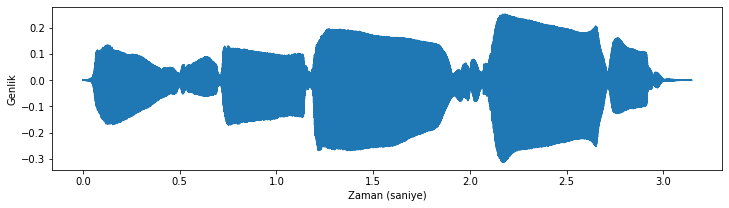

In [ ]:
# Çizimde x ekseninde noktaların zamanda yerlerini içeren vektörün(t) oluşturulması 
t = np.arange(0, ses.size/ornekleme_fr, 1/ornekleme_fr)
fig = plt.figure(figsize=(12,3))
plt.plot(t,ses)
plt.xlabel('Zaman (saniye)');plt.ylabel('Genlik');

Şekil 1.25: *Sayısal ses sinyali örneği*

Bu sinyalin volümünü başlangıçta yavaş yavaş artırıp, bitişte de yavaş yavaş azaltmayı tercih edebiliriz. Bu işleme müzik ses işlemede *fade in fade out* adı veriliyor. Bunu sinyali aynı boyutta bir üçgen pencere ile eleman eleman çarparak gerçekleştirebiliriz: 

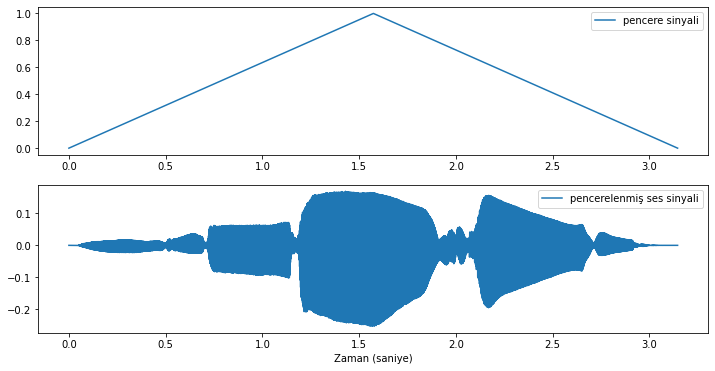

In [ ]:
ucgen_pencere = signal.get_window('triang', ses.size) 
pencerelenmis_ses = ses * ucgen_pencere # Eleman-eleman çarpma işlemi
fig = plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(t,ucgen_pencere,label='pencere sinyali');plt.legend()
plt.subplot(2,1,2)
plt.plot(t,pencerelenmis_ses,label='pencerelenmiş ses sinyali');plt.legend()
plt.xlabel('Zaman (saniye)');

Şekil 1.26: *Sinyalin üçgen pencere fonksiyonu ile eleman-elemana çarpılması*

Pencerelenmiş sinyali dinleyebiliriz:

In [ ]:
IPython.display.Audio(pencerelenmis_ses, rate=ornekleme_fr)

Bu tür pencereleme işlemlerini daha çok ses sinyalinden küçük parçalar alıp inceleme yaparken kullanıyor olacağız. Şimdilik bu örneği yeterli görüp bir sonraki çarpma işlemimize geçelim.

### Polinom çarpımı, konvolüsyon

Sinyal işleme öğrenmeye başlayan birisi için ilk şaşırtıcı işlem konvolüsyon (İng: convolution) ismi verilen işlemdir. **Konvolüsyon temelde bir polinom çarpım işlemidir**. Bir örnek üzerinden ele alalım. Şu iki polinomu çarpmak istediğimizi düşünelim: 
$ (x^{2} + 5) $ ve $ (2x^{2} - 3x - 1)$ 

Çarpmayı elle kağıt üzerinde yaparsak elde edeceğimiz polinom: $ (2x^{4} - 3x^{3} + 9x^{2} - 15x - 5)$  

Şimdi konvolüsyon işlemiyle aynı işlemi kodla gerçekleştirelim:


In [ ]:
# Birinci polinomun katsayı vektörü ile tanımı
polinom1 = np.array([1,0,5]) # (1*𝑥^2 + 0*x^1 + 5*x^0)
# İkinci polinomun katsayı vektörü ile tanımı
polinom2 = np.array([2,-3,-1]) # (2*𝑥^2 + (-3)*x^1 + (-1)*x^0)
# Polinom çarpma işlemi
sonuc_polinom = np.convolve(polinom1, polinom2)
print(sonuc_polinom)

[  2  -3   9 -15  -5]


Sinyal işlemede konvolüsyon işlemini daha çok zamanla değişmeyen doğrusal bir sistemin($f()$) verilen bir girdi sinyalinden üreteceği sinyali hesaplamak için kullanırız. 

Sistemin bir dürtü(*impulse*) girdiye karşılık üreteceği çıktıya dürtü cevabı([*impulse response*](https://en.wikipedia.org/wiki/Impulse_response#:~:text=In%20signal%20processing%2C%20the%20impulse,response%20to%20some%20external%20change.)) ismi verilir (ve genelde $h[n]$ ile temsil edilir).

Girdi:  $\delta[n] → f →$ Çıktı: $h[n]$ 

$h[n] = f(\delta[n])$

Sistem zamanla değişmediği için girişte $k$ örneklik gecikme çıkışta da aynı miktarda gecikmeye neden olma dışında değişim yaratmaz.

Girdi: $\delta[n-k] → f →$ Çıktı: $h[n-k]$ 

$h[n-k] = f(\delta[n-k])$

Verilen herhangi bir sinyal ötelenmiş bir dizi delta sinyalinin ağırlıklandırılmış toplamı şeklinde düşünülebilir. Bu, sinyali ardışık örnekler toplamı olarak ifade etmeye karşılık gelir. 


$$x[n] = \sum_{k = -\infty}^{\infty} x[k]\delta[n-k]$$

Burada $x[k]$lar skaler ağırlıklara karşılık gelmekte. 


Sistem doğrusal olduğuna göre, $x[n]$ giriş sinyaline karşılık oluşturacağı çıkışı hesaplarken $x[n]$'i $\delta[n]$'lere bölüp, her bir delta için bir çıkış sinyali elde edip sonra bu çıkışların tümünü toplayarak $x[n]$'e karşılık oluşturulacak $y[n]$ çıkış sinyalini hesaplayabiliriz. 

Örneğin $x[n]$ sinyalinin *n=2*'deki bileşeni $x[2]\delta[n-2]$ olup buna karşılık oluşturulacak çıktı $x[2]h[n-2]$dir. Tüm $x[n]$ için yazarsak konvolüsyon işlemini elde ederiz.

$$y[n] = x[n] \circledast h[n]$$

$$y[n] = \sum_{k = -\infty}^{\infty} x[k]h[n-k]$$

In [ ]:
def konvolusyon(x, h):
  '''Konvolüsyon işleminin kaydırılmış dürtü cevaplarının toplamı şeklinde gerçekleştirilmesi'''
  
  # Konvolusyon sonucu toplam uzunluğun uzunluk(x)+uzunluk(h)-1 olmasını bekliyoruz
  konv_sonuc_uzunluk = len(x) + len(h) -1
  
  # Formüldeki sigma işlemini kümülatif sinyal toplamı olarak gerçekleştirelim
  #  Kümülatif toplam için önce sıfırlar taşıyan bir sinyal oluşturacağız
  sonuc = np.zeros((konv_sonuc_uzunluk,))
  # Şimdi kaydırılmış ve ağırlıklandırılmış h[n]'leri sinyalimizin üzerine toplayabiliriz
  for k, x_k in enumerate(x):
    # Kaydırılmış dürtü cevabını sinyalin başına sıfırlar ekleyerek elde edelim
    h_n_eksi_k = np.concatenate((np.zeros((k,)), h, np.zeros((konv_sonuc_uzunluk-k-len(h),))), axis=None)
    sonuc += x_k * h_n_eksi_k
  return sonuc

Yazdığımız konvolusyon fonksiyonunu yukarıdaki polinom çarpma örneğinde deneyelim:
$ (x^{2} + 5) (2x^{2} - 3x - 1) = (2x^{4} - 3x^{3} + 9x^{2} - 15x - 5)$

In [ ]:
# (1*𝑥^2 + 0*x^1 + 5*x^0) (2*𝑥^2 + (-3)*x^1 + (-1)*x^0)
sonuc_polinom = konvolusyon(np.array([1,0,5]), np.array([2,-3,-1]))
print(sonuc_polinom)

[  2.  -3.   9. -15.  -5.]


### Temel işlemlerin kullanım örnekleri

**Gerçek hayatta ne işimize yarayacak?** 
Konvolüsyon işleminin sinyal işlemede çok işe yaradığını defterlerimizdeki örneklerde göreceğiz. Gündelik yaşamda ise; ne zaman bir etkinin/tetiklemenin/değişimin cevabı zamana yayılıyor ve ardışık bir dizi etkinin/değişimin neden olacağı toplam sonucu hesaplamak ihtiyacı duyuyoruz, konvolüsyon işlemini hatırlayabiliriz. İşte bir örnek:

Bir kutu fabrikası siparişlere yetişemediği için şöyle bir uygulamaya başlamıştır: gelen her siparişin için o gün siparişin yarısını, ertesi gün %25'ini ve sonraki gün geri kalan %25'ini teslim etmektedir. Bu fabrikadan aşağıdaki siparişleri ardışık günlerde talep ettiğimizde her gün elimize ne kadar kutu geçer?

**Sipariş-1:** İlk gün 100 kutu, 5. gün 80 kutu, 10. gün 20 kutu

**Sipariş-2:** İlk gün 80 kutu, 2. gün 100 kutu, 3. gün 40 kutu

Bu problemde her günün siparişi, o günden başlayarak toplam 3 gün süreyle elimize çeşitli miktarlarda kutu geçmesi sonucunu üretecek. Günlere göre varan kutu sayılarını hesaplamak için bizim zamanda her bir siparişe yapılan 3 günlük dönüşü üstüste toplamamız gerekecek. Konvolüsyon tam da bu işlemi yapıyor. Python koduyla şu şekilde yapabiliriz: 

Fabrika'nın siparişlere verdiği cevabı dürtü cevabı olarak düşünebiliriz. Bir sipariş geldiğinde 3 gün süren bir cevap verecek. Değerlerimizi bir birim sipariş ($\delta[n]$) verildiği duruma göre belirleyeceğiz. 

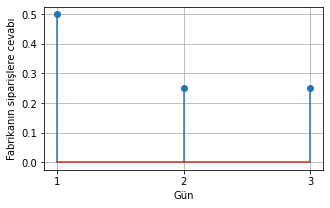

In [ ]:
fabrika_cevabi = np.array([0.5, 0.25, 0.25])
gunler = np.arange(1, fabrika_cevabi.size+1) 
fig = plt.figure(figsize=(5,3))
plt.stem(gunler, fabrika_cevabi); plt.xlabel('Gün');plt.ylabel('Fabrikanın siparişlere cevabı');plt.grid();plt.xticks(ticks=gunler);

Şekil 1.27: *Fabrikanın bir birim talebe karşılık yaptığı teslimat: fabrika ilk gün %50'sini, ikinci gün %25'ini ve 3. gün %25'ini teslim ediyor*

Siparişleri de dizilerle ifade edebiliriz:

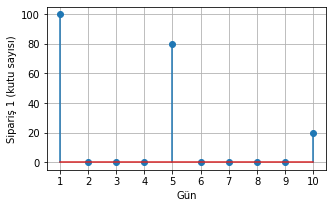

In [ ]:
siparis_1 = np.array([100,0,0,0,80,0,0,0,0,20]) # İlk gün 100 kutu, 5. gün 80 kutu, 10. gün 20 kutu
gunler = np.arange(1, siparis_1.size+1)
fig = plt.figure(figsize=(5,3))
plt.stem(gunler, siparis_1); plt.xlabel('Gün');plt.ylabel('Sipariş 1 (kutu sayısı)');plt.grid();plt.xticks(ticks=gunler);

Şekil 1.28: *Sipariş-1'in dizi olarak temsili*

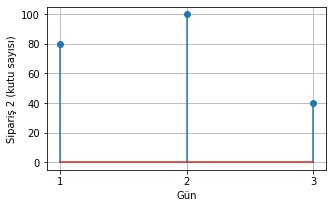

In [ ]:
siparis_2 = np.array([80,100,40]) #  İlk gün 80 kutu, 2. gün 100 kutu, 3. gün 40 kutu
gunler = np.arange(1, siparis_2.size+1)
fig = plt.figure(figsize=(5,3))
plt.stem(gunler, siparis_2); plt.xlabel('Gün');plt.ylabel('Sipariş 2 (kutu sayısı)');plt.grid();plt.xticks(ticks=gunler);

Şekil 1.29: *Sipariş-2'in dizi olarak temsili*

Şimdi ele geçen miktarları konvolüsyon kullanarak hesaplayalım ve çizdirelim:

Günlere göre elimize geçen kutu miktarı:
Gün  1 : 50 kutu
Gün  2 : 25 kutu
Gün  3 : 25 kutu
Gün  4 : 0 kutu
Gün  5 : 40 kutu
Gün  6 : 20 kutu
Gün  7 : 20 kutu
Gün  8 : 0 kutu
Gün  9 : 0 kutu
Gün  10 : 10 kutu
Gün  11 : 5 kutu
Gün  12 : 5 kutu


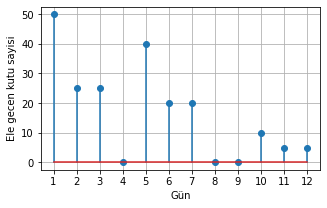

In [ ]:
ele_gecen_1 = konvolusyon(siparis_1, fabrika_cevabi) # hesabın yapıldığı adım
gunler = np.arange(1, ele_gecen_1.size+1)
print("Günlere göre elimize geçen kutu miktarı:")
for gun, ele_gecen in zip(gunler, ele_gecen_1):
  print("Gün ", gun, ":", int(ele_gecen), "kutu")
fig = plt.figure(figsize=(5,3))
plt.stem(gunler, ele_gecen_1); plt.xlabel('Gün');plt.ylabel('Ele gecen kutu sayisi');plt.grid();plt.xticks(ticks=gunler);

Şekil 1.30: *Sipariş-1 için teslim alınan kutu miktarları: sipariş-1 ve fabrika cevabı konvolüsyonu ile hesaplandı*

Şimdi ikinci şipariş için aynı işlemleri yapalım:

Günlere göre elimize geçen kutu miktarı:
Gün  1 : 40 kutu
Gün  2 : 70 kutu
Gün  3 : 65 kutu
Gün  4 : 35 kutu
Gün  5 : 10 kutu


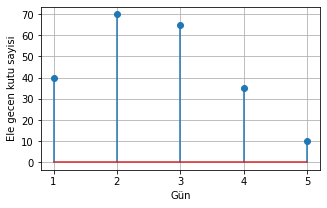

In [ ]:
ele_gecen_2 = konvolusyon(siparis_2, fabrika_cevabi) # hesabın yapıldığı adım
gunler = np.arange(1, ele_gecen_2.size+1)
print("Günlere göre elimize geçen kutu miktarı:")
for gun, ele_gecen in zip(gunler, ele_gecen_2):
  print("Gün ", gun, ":", int(ele_gecen), "kutu")
fig = plt.figure(figsize=(5,3))
plt.stem(gunler, ele_gecen_2); plt.xlabel('Gün');plt.ylabel('Ele gecen kutu sayisi');plt.grid();plt.xticks(ticks=gunler);

Şekil 1.31: *Sipariş-2 için teslim alınan kutu miktarları: sipariş-2 ve fabrika cevabı konvolüsyonu ile hesaplandı*

Yukarıda 1. siparişte 1. 5. ve 10. günde talep iletiliyordu. Bu durumda elle hesap yapmamız kolay, çünkü fabrikanın dürtü cevabı 3 gün sürüyor ve ardışık talepler arasında 3'ten fazla gün var. İkinci siparişte ise ardışık günlerde iletilen talepler var.

Benzer durumu farklı sinyal örnekleri için oluşturalım. Yukarıdaki ilk ve ikinci sipariştekine benzer iki $x[n]$ sinyali oluşturalım ve bir $h[n]$ sinyaliyle konvolüsyon sonuçlarını inceleyelim. 

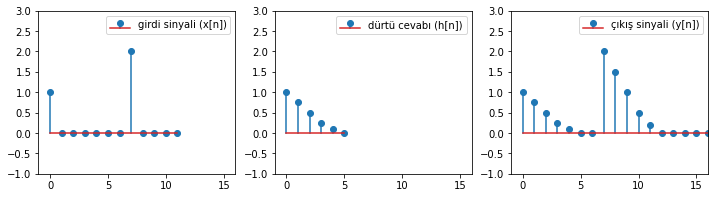

In [ ]:
# Örnek sistem dürtü cevabı
h_n = np.array([1, 0.75, 0.5, 0.25, 0.1, 0]) # keyfi seçilmiş değerler içeriyor
# Örnek girdi
x_n = np.array([1, 0, 0 , 0 , 0, 0 , 0 , 2, 0, 0 , 0 , 0]) # dürtüler arası uzak olacak şekilde keyfi seçilmiş değerler içeriyor
# Çıktının konvolusyon ile hesaplanması
y_n = konvolusyon(x_n, h_n)
# Numpy kütüphanesindeki fonksiyonla işlem yapmak istersek:
# output_signal = np.convolve(x_n, h_n)

fig = plt.figure(figsize=(12,3))
plt.subplot(1,3,1);plt.stem(x_n, label = 'girdi sinyali (x[n])'); plt.legend();plt.ylim(-1,3);plt.xlim(-1,16);
plt.subplot(1,3,2);plt.stem(h_n, label = 'dürtü cevabı (h[n])'); plt.legend();plt.ylim(-1,3);plt.xlim(-1,16);
plt.subplot(1,3,3);plt.stem(y_n, label = 'çıkış sinyali (y[n])'); plt.legend();plt.ylim(-1,3);plt.xlim(-1,16);

Şekil 1.32: *Konvolüsyon örneği*


Yukarıdaki örnekte gördüğümüz gibi, dürtü cevabı $h[n]$, $x[n]$'deki dürtüler kadar ötelenip kopyalandı ve büyüklüklerle çarpıldıktan sonra toplandı. Eğer $x[n]$ içerisindeki $\delta[n]$ler bu şekilde birbirinden ayrık olmak yerine ardışık olsalardı, bunlara karşılık sistemin vereceği çıktılar da üstüste binecekti. Bu durumda görsel olarak sistemin tekil dürtülerden kaynaklı cevaplarını gözleme şansımız olmayacaktı. $x[n]$ sinyalinde iki ardışık dürtü olduğu durumda hesaplanan çıktı sinyalini çizdirip inceleyelim.

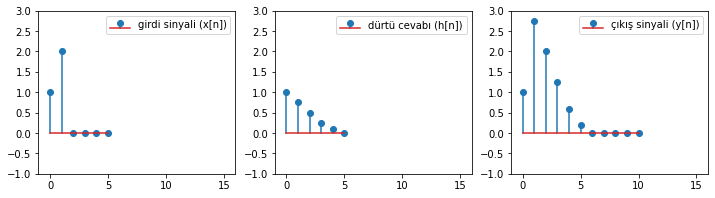

In [ ]:
# Örnek sistem dürtü cevabı
h_n = np.array([1, 0.75, 0.5, 0.25, 0.1, 0])
# Örnek girdi
x_n = np.array([1, 2, 0, 0 , 0 , 0])
# Çıktının konvolusyon ile hesaplanması
y_n = np.convolve(x_n, h_n)

fig = plt.figure(figsize=(12,3))
plt.subplot(1,3,1);plt.stem(x_n, label = 'girdi sinyali (x[n])'); plt.legend();plt.ylim(-1,3);plt.xlim(-1,16);
plt.subplot(1,3,2);plt.stem(h_n, label = 'dürtü cevabı (h[n])'); plt.legend();plt.ylim(-1,3);plt.xlim(-1,16);
plt.subplot(1,3,3);plt.stem(y_n, label = 'çıkış sinyali (y[n])'); plt.legend();plt.ylim(-1,3);plt.xlim(-1,16);

Şekil 1.33: *Konvolüsyon örneği*

Bu örnekte kaydırılmış $h[n]$ler üstüsüte bindi ve toplandı.

Şimdi bir ses sinyali kullanarak konvolüsyon işleminin kullanımını örneklendirelim. Ses sinyalini iki farklı sisteme girdi olarak vermeyi deneyeceğiz. Birincisi bir filtre, ikincisi bir akustik oda filtresi olacak. Daha önce yüklediğimiz ses sinyalini tekrar dinleyelim:

In [ ]:
IPython.display.Audio(ses, rate=ornekleme_fr)

**Filtre örneği:**

Scipy kütüphanesinin hazır fonksiyonlarını kullanarak bir düşük geçiren filtrenin dürtü cevabını($h[n]$) edinelim.

Filtre tasarım fonksiyonu:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html#scipy.signal.firwin

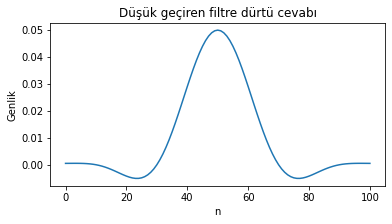

In [ ]:
from scipy import signal
numtaps = 101 # Filtre cevabının uzunluğu
f = 0.05 # Normalize kesim frekansı (bunu daha sonra sayısal filtreler bölümünde açıklayacağız)
h_n = signal.firwin(numtaps, f) # Filtre sistem dürtü cevabının oluşturulması 
fig = plt.figure(figsize=(6,3))
plt.plot(h_n);plt.xlabel('n');plt.ylabel('Genlik');plt.title('Düşük geçiren filtre dürtü cevabı');

Şekil 1.34: *Filtre cevabı örneği*

Ses sinyalini filtreye girdi olarak verelim ve çıkış sinyalini(y[n]) hesaplayalım.

Girdi: $x[n] → [h_{filtre}[n]] → $ Çıktı: $y[n]$

$y[n] = x[n] \circledast h[n]$


In [ ]:
y_n = np.convolve(ses, h_n)
IPython.display.Audio(y_n, rate=ornekleme_fr)

Düşük geçiren filtre sonucunda ses boğuklaştı. Şimdi bir de yüksek geçiren filtre deneyelim.

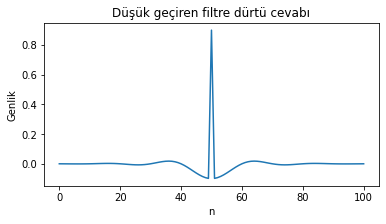

In [ ]:
numtaps = 101
f = 0.1
h_n = signal.firwin(numtaps, f, pass_zero=False) # son değişken yüksek geçiren olmasını sağlıyor
fig = plt.figure(figsize=(6,3))
plt.plot(h_n);plt.xlabel('n');plt.ylabel('Genlik');plt.title('Düşük geçiren filtre dürtü cevabı');

y_n = np.convolve(ses, h_n)
IPython.display.Audio(y_n, rate=ornekleme_fr)

Şekil 1.35: *Filtre cevabı örneği*

Filtreleme sonucunda seste sadece tiz frekanslarındaki bileşenler kaldı.

Şimdiki örneğimizde bir katedralin dürtü cevabını kullanarak elimizdeki sese 'katedral etkisi' ekleyeceğiz. Katedral dürtü cevabını indirip dinleyelim. Katedralin dürtü cevabı, bir kuru-sıkı tabanca sesi dürtü olarak kullanılarak ve katedralin orta noktasında kayıt alınarak elde edilmiş.

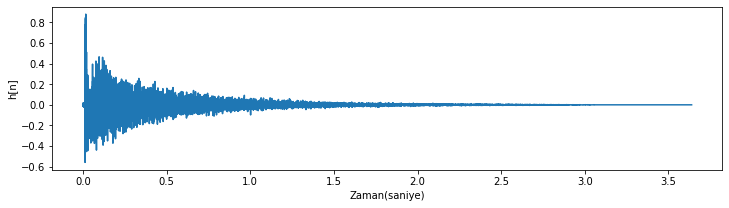

In [ ]:
import urllib.request
import os, sys

link = 'https://github.com/barisbozkurt/dataDumpForCourses/raw/master/impulse_cathedral_44100.wav'
dosya_ismi = link.split('/')[-1]
urllib.request.urlretrieve(link, dosya_ismi)

h_n, ornekleme_fr = sf.read(dosya_ismi)
fig = plt.figure(figsize=(12,3))
plt.plot(np.arange(0,h_n.size/ornekleme_fr,1/ornekleme_fr), h_n)
plt.xlabel('Zaman(saniye)');plt.ylabel('h[n]')
IPython.display.Audio(h_n, rate=ornekleme_fr)

Şekil 1.36: *Katedral dürtü cevabı sinyali*

Bu dürtü cevabı ile ses sinyalini konvolüsyon işlemine tabi tutarak 'katedral etkisi'ni sese uygulayabiliriz

In [ ]:
y_n = np.convolve(ses, h_n)
IPython.display.Audio(y_n, rate=ornekleme_fr)

Son örnek olarak bir konuşma ses dosyasında küçük bir parça alıp ses sentezi için kullanacağız. Bunun için yukarıdaki iki tür çarpma işlemini kullanacağız. Birincisi pencereleme için eleman-elemana çarpma, ikincisi konvolüsyon.

Öncelikle ses dosyamızı indirip küçük bir kısmını pencereleyelim

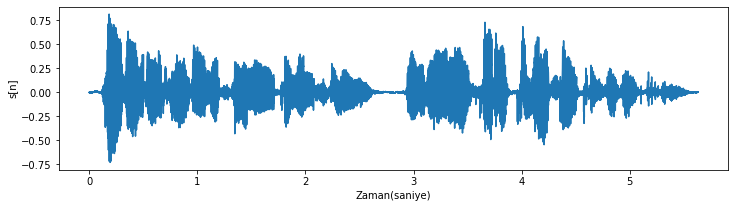

In [ ]:
link = 'https://github.com/MTG/sms-tools/raw/master/sounds/speech-male.wav'
dosya_ismi = link.split('/')[-1]
urllib.request.urlretrieve(link, dosya_ismi)

konusma_sinyali, ornekleme_fr = sf.read(dosya_ismi)
fig = plt.figure(figsize=(12,3))
plt.plot(np.arange(0,konusma_sinyali.size/ornekleme_fr,1/ornekleme_fr), konusma_sinyali)
plt.xlabel('Zaman(saniye)');plt.ylabel('s[n]');
IPython.display.Audio(konusma_sinyali, rate=ornekleme_fr)

Şekil 1.37: *Konuşma sinyali örneği*

Bir bölgeye yakından bakalım:

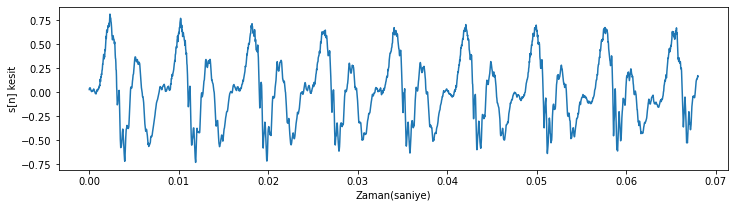

In [ ]:
baslangic_endeks = 8000 # Kesit değerleri keyfi olarak birkaç periyodluk bölüm içerecek şekilde seçildi
bitis_endeks = 11000
kesit = konusma_sinyali[baslangic_endeks:bitis_endeks]
fig = plt.figure(figsize=(12,3))
plt.plot(np.arange(0,kesit.size/ornekleme_fr,1/ornekleme_fr), kesit)
plt.xlabel('Zaman(saniye)');plt.ylabel('s[n] kesit');
IPython.display.Audio(kesit, rate=ornekleme_fr)

Şekil 1.38: *Şekilde 1.32'deki konuşma sinyalinin bir kesiti*

Dalgaların birbirini tekrar ettiğini görüyoruz. Dalgalardan birisini alarak farklı periyotta tekrar ettirerek sentez yapmaya çalışalım. Tek dalgalık bir kesiti alıp pencere fonksiyonu ile çarpacağız. 

Pencerelenmiş sinyali dinlediğinizde 'i' sesinden küçük bir kesit alınmış olduğunu göreceksiniz. 

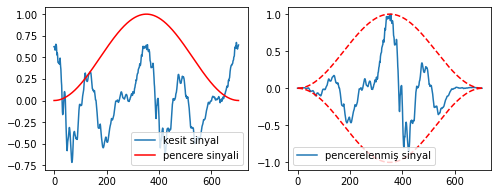

In [ ]:
# Pencereleme işlemi
kesit_sinyal = konusma_sinyali[8807:9511] # endeks değerleri sinyal üzerinde gözlemle seçildi
pencere = signal.get_window('hann', kesit_sinyal.shape[0])
# Eleman-elemana çarpma işlemi
pencereli_kisa_sinyal = kesit_sinyal * pencere
# Genlik normalizasyonu (sinyali [-1,1] aralığına almak için en büyük değerine bölüyoruz)
pencereli_kisa_sinyal = pencereli_kisa_sinyal / np.max(np.abs(pencereli_kisa_sinyal))

fig = plt.figure(figsize=(8,3))
plt.subplot(1,2,1);
plt.plot(kesit_sinyal,label='kesit sinyal');
plt.plot(pencere,'r',label='pencere sinyali');plt.legend();
plt.subplot(1,2,2);
plt.plot(pencereli_kisa_sinyal,label='pencerelenmiş sinyal');
plt.plot(pencere,'r--');plt.plot(-pencere,'r--');
plt.legend();
IPython.display.Audio(pencereli_kisa_sinyal, rate=ornekleme_fr)

Şekil 1.39: *Şekilde 1.32, 1.33'teki konuşma sinyalinin küçük bir kesitinin pencerelenmesi*

Şimdi periyod T0 = 300 örnek olacak şekilde dürtü katarı oluşturalım ve elimizdeki pencerenmiş kesit ile konvolüsyona tabi tutalım. Konvolüsyon, kesitin her bir dürtü üzerine kopyalanmasını sağlayacak, bu şekilde periyodik bir ses sinyali oluşturmuş olacağız. 

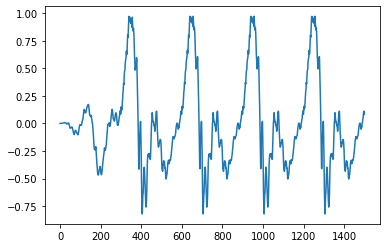

In [ ]:
N = 10000 # Dürtü katarı uzunluğu
n = np.arange(N) # Endeks değerlerini tutan vektörün oluşturulması
T0 = 300 # Hedeflenen yeni periyod (örnek sayısı cinsinden)

durtu_katari = np.zeros((N, ))
durtu_katari[ n % T0 == 0] = 1 # T0 ile tam bölünen endeks değerleri 1 yapılıyor

y_sentez = np.convolve(pencereli_kisa_sinyal, durtu_katari)
plt.plot(y_sentez[:T0*5]); # Sinyalin bir kısmını çizdirelim
IPython.display.Audio(y_sentez, rate=ornekleme_fr)

Şekil 1.40: *Sentezlenen konuşma sinyali (periyot = 300 örnek)*

Şimdi de periyod T0 = 450 örnek olacak şekilde dürtü katarı kullanalım.

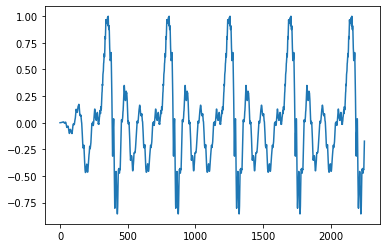

In [ ]:
T0 = 450

durtu_katari = np.zeros((N, ))
durtu_katari[ n % T0 == 0] = 1 # T0 ile tam bölünen endeks değerleri 1 yapılıyor

y_sentez = np.convolve(pencereli_kisa_sinyal, durtu_katari)
plt.plot(y_sentez[:T0*5]); # Sinyalin bir kısmını çizdirelim
IPython.display.Audio(y_sentez, rate=ornekleme_fr)

Şekil 1.41: *Sentezlenen konuşma sinyali (periyot = 450 örnek)*

Bu örnekte küçük bir ses sentez demosu yapmış olduk. Bunu yaparken iki temel çarpma işlemi kullandık: pencereleme için eleman-elemana çarpma, periyodik sentez için dürtü katarı ile konvolüsyon.

Bu defterimizde temel sinyal bileşenleri ve temel sinyal operasyonlarını ele almış olduk. Bir sonraki defterimizde sayısal sistemleri ele alacağız. 

**Kaynakça:**


*   https://www.coursera.org/learn/audio-signal-processing/lecture/wqOJw/basic-mathematics
*   https://ccrma.stanford.edu/~jos/mdft/
*   Oppenheim, A. V. (1999). Discrete-time signal processing. Pearson Education. Chapter 2.


**Yazar:** Barış Bozkurt, **editör:** Ahmet Uysal

---

